# #1 欠損値の扱い

In [1]:
import numpy as np

In [2]:
# csvファイルの表示

# !cat 2D_example_data.csv
with open('2D_example_dame.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602



In [3]:
data = np.loadtxt("2D_example_dame.csv", delimiter=",")

In [4]:
y = data[:, 0].astype(int) #1列目がラベル、整数に変換

In [5]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [6]:
X = data[:, 1:3]

In [7]:
X

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,           nan],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [          nan, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

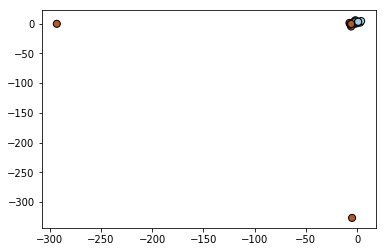

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")

(-10, 10)

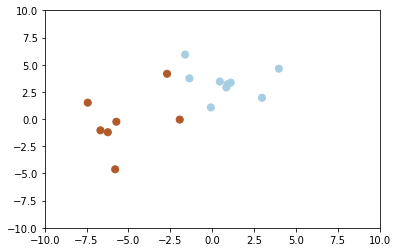

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [11]:
#NaNと外れ値を場外する
~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [12]:
~np.isnan(X[:,1])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [13]:
~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True])

In [14]:
# X1にはNaNがない
X1 = X[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]
y1 = y[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]

In [15]:
X1, X1.shape

(array([[-7.428476e+00,  1.509903e+00],
        [ 2.980693e+00,  1.960821e+00],
        [ 3.988255e+00,  4.636389e+00],
        [-5.789437e+00, -4.621614e+00],
        [-4.894447e+00, -3.269730e+02],
        [-1.933949e+00, -4.727600e-02],
        [-1.611771e+00,  5.932201e+00],
        [-6.670152e+00, -1.036282e+00],
        [-2.931415e+02, -1.044750e-01],
        [-7.476200e-02,  1.070002e+00],
        [-2.691793e+00,  4.168774e+00],
        [ 4.611820e-01,  3.453438e+00],
        [-1.354135e+00,  3.751657e+00],
        [-6.229476e+00, -1.209434e+00],
        [-5.719578e+00, -2.435090e-01],
        [ 9.283220e-01,  3.208520e+00],
        [ 8.504750e-01,  2.908955e+00],
        [ 1.116025e+00,  3.353602e+00]]), (18, 2))

In [16]:
(abs(X1[:, 0]) < 10), (abs(X1[:, 1]) < 10)

(array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]))

In [17]:
X2 = X1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]
y2 = y1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]

In [18]:
X2, X2.shape

(array([[-7.428476,  1.509903],
        [ 2.980693,  1.960821],
        [ 3.988255,  4.636389],
        [-5.789437, -4.621614],
        [-1.933949, -0.047276],
        [-1.611771,  5.932201],
        [-6.670152, -1.036282],
        [-0.074762,  1.070002],
        [-2.691793,  4.168774],
        [ 0.461182,  3.453438],
        [-1.354135,  3.751657],
        [-6.229476, -1.209434],
        [-5.719578, -0.243509],
        [ 0.928322,  3.20852 ],
        [ 0.850475,  2.908955],
        [ 1.116025,  3.353602]]), (16, 2))

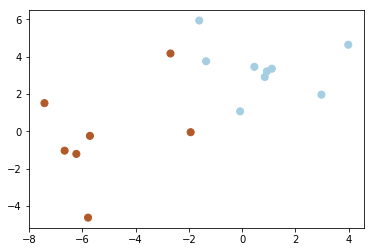

In [19]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50)

In [20]:
# NaNを埋める

In [21]:
from sklearn.preprocessing import Imputer

In [22]:
missing_value_to_mean = Imputer()

In [23]:
missing_value_to_mean.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [24]:
X_new = missing_value_to_mean.transform(X)

In [25]:
X_new

array([[-7.42847600e+00,  1.50990300e+00],
       [ 2.98069300e+00,  1.96082100e+00],
       [ 3.98825500e+00,  4.63638900e+00],
       [-5.78943700e+00, -4.62161400e+00],
       [-4.89444700e+00, -3.26973000e+02],
       [-1.93394900e+00, -4.72760000e-02],
       [-1.61177100e+00,  5.93220100e+00],
       [-6.67015200e+00, -1.03628200e+00],
       [-2.93141500e+02, -1.04475000e-01],
       [-7.47620000e-02,  1.07000200e+00],
       [-2.69179300e+00,  4.16877400e+00],
       [ 4.61182000e-01,  3.45343800e+00],
       [-1.35413500e+00,  3.75165700e+00],
       [-6.22947600e+00, -1.20943400e+00],
       [ 2.77859400e+00, -1.57953962e+01],
       [-5.71957800e+00, -2.43509000e-01],
       [ 9.28322000e-01,  3.20852000e+00],
       [ 8.50475000e-01,  2.90895500e+00],
       [-1.70755753e+01, -1.83119900e+00],
       [ 1.11602500e+00,  3.35360200e+00]])

In [26]:
# 平均値でNaNを埋める場合は外れ値を除外してからする
# 中央値で埋める

missing_value_to_median = Imputer(strategy='median')
missing_value_to_median.fit(X)
X_new2 = missing_value_to_median.transform(X)
X_new2

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,  1.509903e+00],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [-1.611771e+00, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

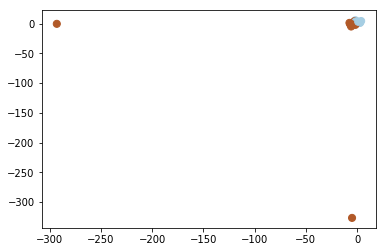

In [27]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y, s=50)

# #2 特徴抽出

In [28]:
import urllib.request

In [29]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", "allice.txt")

('allice.txt', <http.client.HTTPMessage at 0x7fb59b477048>)

In [30]:
with open('allice.txt') as f:
    print(f.read()[710:1400])



CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ thought Alice ‘without pictures or
conversations?’

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice 


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
txt_vec = CountVectorizer(input='filename')

In [33]:
txt_vec.fit(['allice.txt'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='filename',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
# 特徴量を出力
txt_vec.get_feature_names()[100:120]

['along',
 'aloud',
 'already',
 'also',
 'alteration',
 'altered',
 'alternate',
 'alternately',
 'altogether',
 'always',
 'am',
 'ambition',
 'among',
 'an',
 'ancient',
 'and',
 'anger',
 'angrily',
 'angry',
 'animal']

In [35]:
len(txt_vec.get_feature_names()) # 単語数を表示

3019

In [36]:
allice_vec = txt_vec.transform(['allice.txt'])

In [37]:
allice_vec

<1x3019 sparse matrix of type '<class 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [38]:
allice_vec.shape

(1, 3019)

In [39]:
allice_vec = allice_vec.toarray()

In [40]:
allice_vec[0, 100:120]

array([  6,   5,   3,   4,   1,   1,   1,   1,   5,  13,  16,   1,  12,
        61,   1, 940,   2,   9,   5,   2])

In [41]:
# 　ワードと出現回数を表示
for word, count in zip(txt_vec.get_feature_names()[100:120], allice_vec[0, 100:120]):
    print(word, count)

along 6
aloud 5
already 3
also 4
alteration 1
altered 1
alternate 1
alternately 1
altogether 5
always 13
am 16
ambition 1
among 12
an 61
ancient 1
and 940
anger 2
angrily 9
angry 5
animal 2


# #3 特徴抽出、画像データ

In [42]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


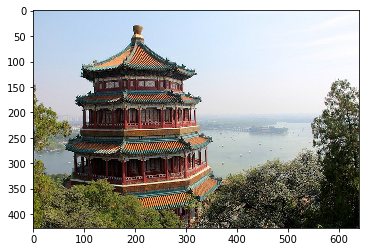

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(china)

In [44]:
china.shape

(427, 640, 3)

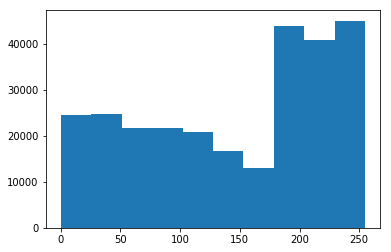

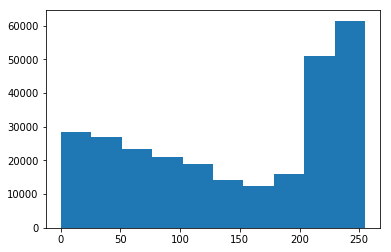

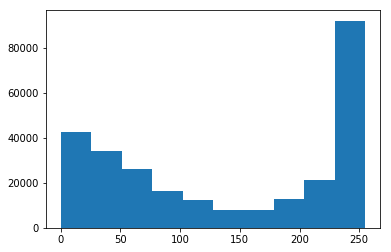

In [45]:
histR = plt.hist(china[:,:,0].ravel(), bins=10)
plt.show()
histG = plt.hist(china[:,:,1].ravel(), bins=10)
plt.show()
histB = plt.hist(china[:,:,2].ravel(), bins=10)
plt.show()

In [46]:
import numpy as np
histRGBcat = np.hstack((histR[0], histG[0], histB[0]))

<BarContainer object of 30 artists>

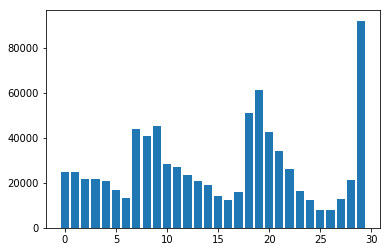

In [47]:
plt.bar(range(len(histRGBcat)), histRGBcat)

# #4 特徴選択

In [48]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [49]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [50]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [51]:
# ベストな特徴だけを選択する
from sklearn.feature_selection import SelectKBest # 上位k個
from sklearn.feature_selection import chi2 # カイ２乗基準

In [52]:
skb = SelectKBest(chi2, k=20)

In [53]:
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x7fb598028840>)

In [54]:
X_train_new = skb.transform(X_train)

In [55]:
X_train.shape, X_train_new.shape

((455, 30), (455, 20))

In [56]:
# どの次元が使われたのか
skb.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [57]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype='<U23')

In [58]:
# 使われなかった次元を調べる
data.feature_names[~skb.get_support()]

array(['mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst fractal dimension'], dtype='<U23')

In [59]:
# 特徴量を30から１つのなかで、最適な特徴量の数を決める

from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [60]:
from sklearn.model_selection import StratifiedKFold


k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:
    ss = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
    score = []
    for train_index, val_index in ss.split(X_train, y_train):
        
        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]
        
        skb = SelectKBest(chi2, k=k)
        
        skb.fit(X_train2, y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        
        clf.fit(X_new_train2, y_train2)
        score.append(clf.score(X_new_val, y_val))
        
    scores.append(np.array(score).mean())
    std.append(np.array(score).std())
    
scores = np.array(scores)
std = np.array(std)

In [61]:
scores


array([0.90777778, 0.93198068, 0.9231401 , 0.91879227, 0.9342029 ,
       0.9384058 , 0.94280193, 0.94497585, 0.95164251, 0.95830918,
       0.95613527, 0.95613527, 0.95391304, 0.95391304, 0.95391304,
       0.95391304, 0.95391304, 0.95826087, 0.95826087, 0.95826087,
       0.95608696, 0.95826087, 0.95608696, 0.95391304, 0.95608696,
       0.962657  , 0.962657  , 0.962657  , 0.962657  , 0.962657  ])

Text(0,0.5,'accuracy')

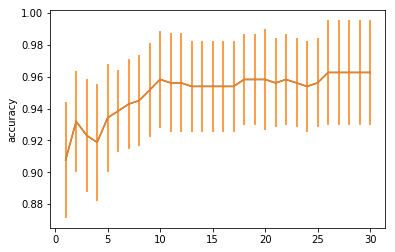

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)
plt.ylabel("accuracy")

Text(0,0.5,'error rate')

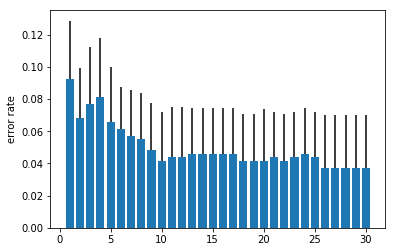

In [63]:
# 標準偏差が1を超えてしまう場合は
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape), std])
plt.ylabel("error rate")

In [64]:
best_k = k_range[np.argmax(scores)]
best_k

26

In [65]:
skb = SelectKBest(chi2, k=best_k)

In [66]:
skb.fit(X_train, y_train)

SelectKBest(k=26, score_func=<function chi2 at 0x7fb598028840>)

In [67]:
# 最適な次元数にする
X_train_best = skb.transform(X_train)
X_test_best = skb.transform(X_test)

In [68]:
clf.fit(X_train_best, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
clf.score(X_test_best, y_test)

0.956140350877193

In [70]:
# 特徴選択をしない場合
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [71]:
# 性能は変わらないが、少ない特徴量で同じ性能を保てれた

# #5特徴変換 PCA

In [72]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [74]:
import pandas as pd 
from pandas.tools.plotting import scatter_matrix

In [75]:
df = pd.DataFrame(data.data[:, 0:10], columns=data.feature_names[0:10])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb58b85ac18>,
      dtype=object)

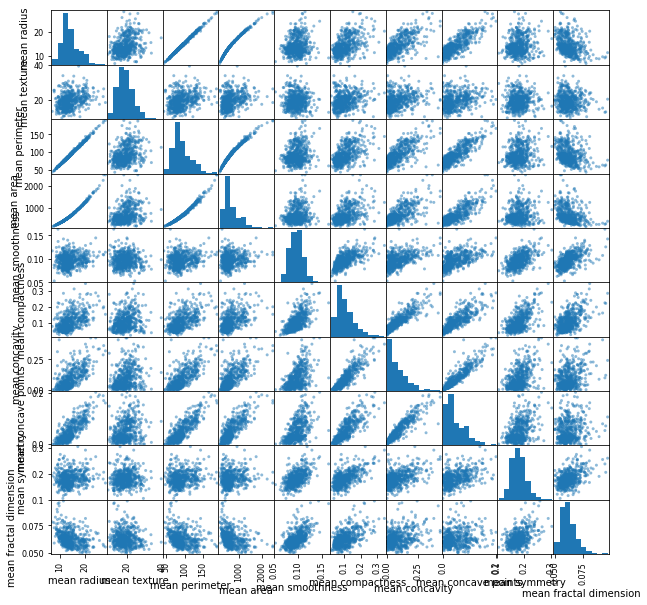

In [76]:
#　相関を見る
scatter_matrix(df, figsize=(10, 10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb589e1eb70>,
      dtype=object)

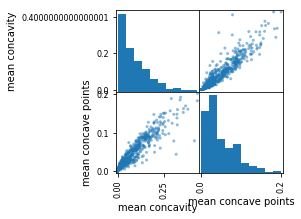

In [77]:
# 特徴量の6,7番目をみて見る
df = pd.DataFrame(data.data[:, 6:8], columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3, 3))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb58974cba8>,
      dtype=object)

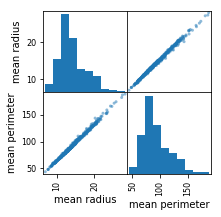

In [78]:
df = pd.DataFrame(data.data[:, [0,2]], columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3, 3))

In [79]:
X = data.data[:, [0,2]]
y = data.target
names  =data.feature_names[[0, 2]]

In [80]:
X.shape, y.shape

((569, 2), (569,))

Text(0,0.5,'mean perimeter')

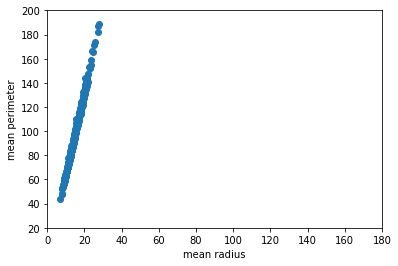

In [81]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA()

In [84]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
X_new = pca.transform(X)

(-60, 120)

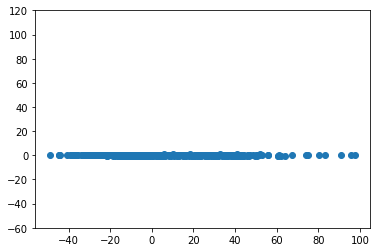

In [86]:
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

In [87]:
pca.explained_variance_

array([6.02807278e+02, 5.21213668e-02])

In [88]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([9.99913543e-01, 8.64569199e-05])

# 特徴変換 : PCAと次元削減

Text(0,0.5,'mean concave points')

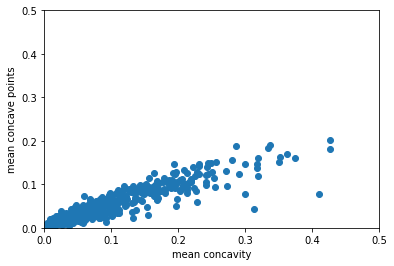

In [89]:
X = data.data[:, [6,7]]
y = data.target

names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

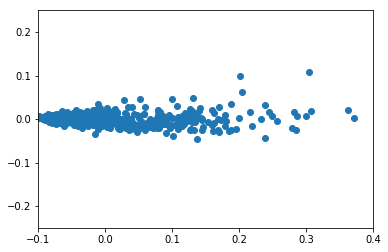

In [90]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [91]:
# 分散を確認する
pca.explained_variance_

array([0.00767254, 0.00018837])

In [92]:
# 寄与率
pca.explained_variance_ratio_

array([0.97603731, 0.02396269])

In [93]:
# 固有値を計算する
m = X.mean(axis=0)

In [94]:
#　偏差
Xp = (X - m)

In [95]:
# 今日分散行列
C = Xp.transpose().dot(Xp)

In [96]:
# 固有値を計算する
w, _ = np.linalg.eig(C)

In [97]:
w

array([4.3580028 , 0.10699332])

In [98]:
# 寄与率
w / w.sum()

array([0.97603731, 0.02396269])

In [99]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [100]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

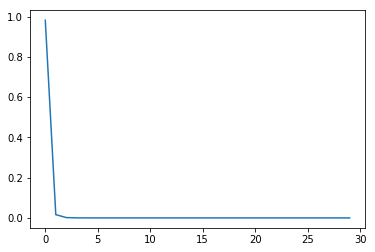

In [101]:
plt.plot(pca.explained_variance_ratio_)

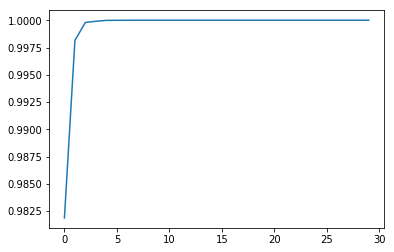

In [102]:
# 寄与率
# 特徴量が5次元あれば再現できる。
#　実は他の２５次元は不要だった。
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [103]:
# 30次元を30次元しただけ
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [104]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [105]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.9473684210526315

In [106]:
# 0番目のデータで学習、テスト
clf.fit(X_train_pca[:, 0:1], y_train)
clf.score(X_test_pca[:, 0:1], y_test)

0.9210526315789473

In [107]:
# 3次元までのデータを使うと
clf.fit(X_train_pca[:, 0:3], y_train)
clf.score(X_test_pca[:, 0:3], y_test)

0.9473684210526315

In [108]:
# 1次元から30次元までかえて、学習させる

scores = []
i_range = range(1, 31)
for i in i_range:
    
    clf.fit(X_train_pca[:, 0:i], y_train)
    scores.append(clf.score(X_test_pca[:, 0:i], y_test))
    
scores = np.array(scores)

(0.7, 1)

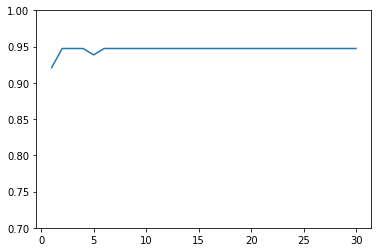

In [109]:
plt.plot(i_range, scores)
plt.ylim(0.7, 1)

In [110]:
# グラフから２次元を使えばいいことが　わかったので
clf.fit(X_train_pca[:, 0:2], y_train)
clf.score(X_test_pca[:, 0:2], y_test)

0.9473684210526315

# #6 特徴変換 非線形(多項式)

In [111]:
from sklearn.preprocessing import PolynomialFeatures

degree 1 : x1, x2, x3  `` 特徴選択はこの中から特徴を選ぶ. 線形変換は特徴量を足したり倍にして割ってなどして、新しい特徴量を出した。``

degree 2 : (x1x2), (x1x3), (x2x3) 

degree 3 : (x1 x2 x3)

In [112]:
polf = PolynomialFeatures(degree = 2)

In [113]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [114]:
X_train_poly = polf.transform(X_train)
X_test_poly = polf.transform(X_test)

In [115]:
# 次元数が増えている
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

In [116]:
# 特徴量を増やすと
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.9649122807017544

In [117]:
# そのままの特徴量だと
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

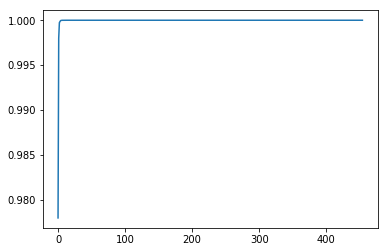

In [118]:
# 500個近い次元があるが5次元も行かない段階で寄与率が100%に近くなる
# 増やした特徴量はあまり情報を持っていない
pca.fit(X_train_poly)
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [119]:
# 増やした特徴量をpcaで削減していく
scores = []

n_features = X_train_poly.shape[1]
# 特徴量を10個おきにループを回す

i_range= range(1, n_features, 10)

X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca = pca.transform(X_test_poly)

for i in i_range:

    
    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    scores.append(clf.score(X_test_poly_pca[:, 0:i], y_test))
    
scores = np.array(scores)

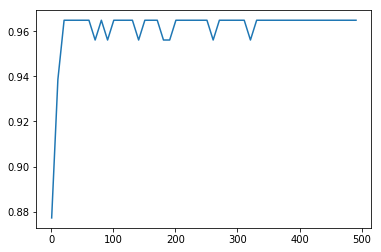

In [120]:
plt.plot(i_range, scores)


次元数 : d= 2
max dimension:  496
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
次元数 : d= 3
max dimension:  5456
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
次元数 : d= 4
max dimension:  46376
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
2次までの変換の方が性能がよく、3,4と増やしても性能は増えない


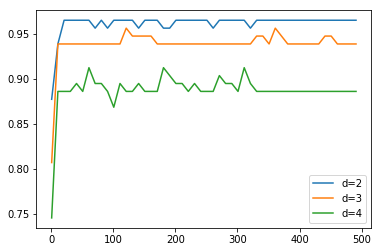

In [121]:
# 今までは2次までの(degree = 2)変換だったが、変換する次元数を変えて見る
for d in [2,3,4]:
    print("次元数 : d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly = polf.transform(X_test)
    
    pca.fit(X_train_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca = pca.transform(X_test_poly)
    
    scores = []
    n_features = min(500, X_train_poly.shape[1])
    i_range = range(1, n_features, 10)
    
    print("max dimension: ", X_train_poly.shape[1])
    
    print("i=", end="")
    for i in i_range:
        print(i, end=",")
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append(clf.score(X_test_poly_pca[:, 0:i], y_test))
    print("")
        
    scores = np.array(scores)
    plt.plot(i_range, scores, label="d={0}".format(d))
plt.legend()

print("2次までの変換の方が性能がよく、3,4と増やしても性能は増えない")

# #7 標準化

In [122]:
import numpy as np 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [123]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [124]:
import matplotlib.pyplot as plt
% matplotlib inline

In [125]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

Text(0,0.5,'mean smoothness')

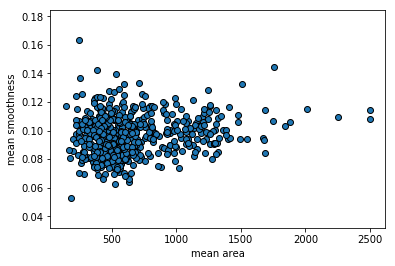

In [126]:
plt.scatter(data.data[:, 3], data.data[:,4], edgecolor="k")
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

Text(0,0.5,'mean smoothness')

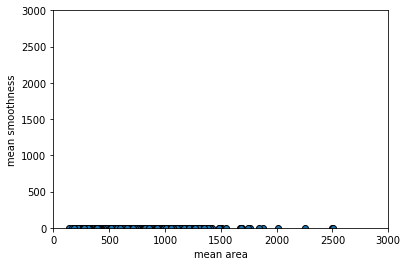

In [127]:
plt.scatter(data.data[:, 3], data.data[:,4], edgecolor="k")
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

In [128]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_tst = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Standardization

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [130]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [131]:
X_train_scale = scaler.transform(X_train)

In [132]:
# 平均0 標準偏差を1にする
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)

(array([-8.97694617e-16, -3.35165351e-15,  3.23355506e-15, -2.22727819e-15,
        -1.46512838e-15,  5.31740403e-16,  6.61497719e-16,  4.76053873e-16,
        -5.68678194e-15,  6.94804409e-16,  4.90450171e-17,  5.76827963e-16,
         8.10706813e-16,  1.82881793e-16,  1.79160716e-15,  4.15540618e-16,
         3.25502751e-16,  6.02265490e-16, -1.51771148e-16,  1.34580991e-15,
        -4.28960896e-16,  4.92402212e-16, -1.51795548e-15,  1.32494748e-16,
         5.92337534e-15, -4.70369317e-16, -1.36923440e-15,  2.56327316e-16,
        -2.12333204e-15,  1.99242332e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [133]:
# 元のデータの平均0と標準偏差1にする
X_train.mean(axis=0), X_train.std(axis=0)

(array([1.41124989e+01, 1.91528791e+01, 9.18182857e+01, 6.53819121e+02,
        9.64133407e-02, 1.03318659e-01, 8.74845356e-02, 4.86900264e-02,
        1.80939121e-01, 6.26680220e-02, 4.02523516e-01, 1.20988066e+00,
        2.82524681e+00, 4.02856176e+01, 7.00339341e-03, 2.50632286e-02,
        3.14727859e-02, 1.16463495e-02, 2.05252703e-02, 3.71029516e-03,
        1.62560967e+01, 2.55387473e+01, 1.07031407e+02, 8.81189890e+02,
        1.32459231e-01, 2.51861846e-01, 2.67491334e-01, 1.14447673e-01,
        2.90416044e-01, 8.34914286e-02]),
 array([3.53148742e+00, 4.15439017e+00, 2.42862794e+01, 3.57772373e+02,
        1.37841928e-02, 5.04344575e-02, 7.77159693e-02, 3.85550295e-02,
        2.73677762e-02, 6.81132951e-03, 2.84057900e-01, 5.41365325e-01,
        2.03551332e+00, 4.76779413e+01, 2.84053720e-03, 1.74905171e-02,
        3.10715741e-02, 5.89071328e-03, 8.18748246e-03, 2.60681955e-03,
        4.88517629e+00, 6.09392372e+00, 3.38319477e+01, 5.85750909e+02,
        2.26008843e-02

In [134]:
X_test_scale = scaler.transform(X_test)

In [135]:
X_test_scale.mean(axis=0), X_test_scale.std(axis=0)

(array([ 0.02090746,  0.16431947,  0.03098112,  0.01492717, -0.01921272,
         0.10117401,  0.0844404 ,  0.02966118,  0.04062282,  0.09495981,
         0.04653793,  0.06428685,  0.10007503,  0.00538732,  0.06604308,
         0.11840198,  0.06761678,  0.12691574,  0.01038083,  0.16199868,
         0.01337734,  0.11341872,  0.03390329, -0.00517026, -0.02001641,
         0.07842833,  0.11756483,  0.01212835, -0.02700757,  0.12745382]),
 array([0.98484055, 1.15221352, 0.99783441, 0.91061412, 1.09332501,
        1.20997119, 1.11614317, 1.02702513, 1.0034221 , 1.16404942,
        0.86929934, 1.0858183 , 0.95738032, 0.73797558, 1.25386932,
        1.10490478, 0.84120579, 1.20933979, 1.04289005, 1.05896921,
        0.94112182, 1.03290198, 0.96071254, 0.84629366, 1.04571542,
        1.12996138, 1.20450506, 1.03208579, 0.90829415, 1.06246714]))

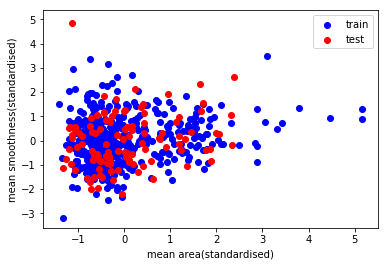

In [136]:
# 標準化したデータをプロットする
plt.scatter(X_train_scale[:, 3], X_train_scale[:, 4], c='blue', label="train")
plt.scatter(X_test_scale[:, 3], X_test_scale[:, 4], c="red", label="test")

plt.xlabel(data.feature_names[3] + "(standardised)")
plt.ylabel(data.feature_names[4] + "(standardised)")
plt.legend(loc="best")

In [137]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [138]:
# 標準化したデータで学習
clf.fit(X_train_scale, y_train)
print(clf.score(X_test_scale, y_test))

0.9649122807017544


In [139]:
# 標準化しないデータで学習
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.956140350877193


# #8 range scaling

In [140]:
# 最大最小を1に抑える
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler([-1, 1])

In [141]:
mmscaler.fit(X_train)
X_train_mms = mmscaler.transform(X_train)
X_test_mms = mmscaler.transform(X_test)

In [142]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))

In [143]:
X_train.max(axis=0), X_train.min(axis=0)

(array([2.811e+01, 3.381e+01, 1.885e+02, 2.501e+03, 1.447e-01, 3.114e-01,
        4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
        2.198e+01, 5.422e+02, 2.333e-02, 1.354e-01, 3.960e-01, 5.279e-02,
        6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
        2.226e-01, 1.058e+00, 1.252e+00, 2.903e-01, 6.638e-01, 2.075e-01]),
 array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
        0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.602e-01,
        7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
        7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
        7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02]))

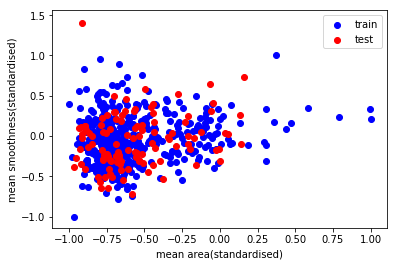

In [144]:

plt.scatter(X_train_mms[:, 3], X_train_mms[:, 4], c='blue', label="train")
plt.scatter(X_test_mms[:, 3], X_test_mms[:, 4], c="red", label="test")

plt.xlabel(data.feature_names[3] + "(standardised)")
plt.ylabel(data.feature_names[4] + "(standardised)")
plt.legend(loc="best")

In [145]:
clf.fit(X_train_mms, y_train)
print(clf.score(X_test_mms, y_test))

0.9649122807017544


#  #8 Normalization 正規化

In [146]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [147]:
# 正規化はfitは必要ない
# normalizer.fit(X_train)

In [148]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [149]:
np.linalg.norm(X_train, axis=1)[:20]

array([ 504.90301766,  618.934165  , 1250.79346781,  680.57848004,
        789.01630477,  836.86533919,  694.54924712,  765.38441537,
        988.35346236,  624.18559733, 2090.96095333,  679.47567586,
       1094.37796043,  609.98361938,  490.99404722,  558.47604006,
       1758.43151043,  550.59180245,  843.30139448,  841.67151693])

In [150]:
np.linalg.norm(X_train_norm, axis=1)[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [151]:
clf.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
print(clf.score(X_test_norm, y_test))

0.7192982456140351


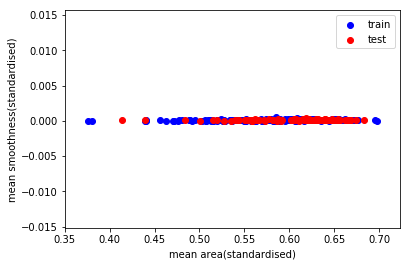

In [153]:

plt.scatter(X_train_norm[:, 3], X_train_norm[:, 4], c='blue', label="train")
plt.scatter(X_test_norm[:, 3], X_test_norm[:, 4], c="red", label="test")

plt.xlabel(data.feature_names[3] + "(standardised)")
plt.ylabel(data.feature_names[4] + "(standardised)")
plt.legend(loc="best")

In [154]:
for norm in ['l2', 'l1', 'max']:
    normalizer = Normalizer(norm=norm)
    normalizer.fit(X_train)
    X_train_norm = normalizer.transform(X_train)
    X_test_norm = normalizer.transform(X_test)
    clf.fit(X_train_norm, y_train)
    print(norm, clf.score(X_test_norm, y_test))

l2 0.7192982456140351
l1 0.6052631578947368
max 0.8157894736842105


# #9 PCA Whitening (白色化)
相関があるものを相関をなくす
x軸y軸の分散を1にする

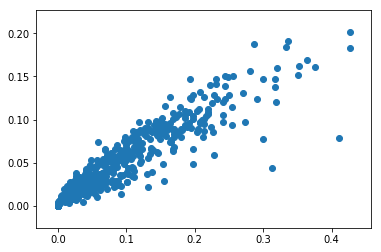

In [155]:
plt.scatter(data.data[:, 6], data.data[:,7])

(0, 0.5)

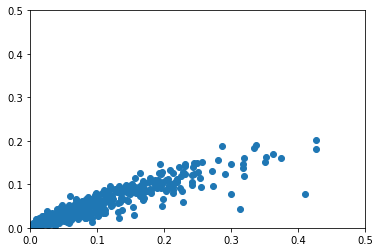

In [156]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

(-0.25, 0.25)

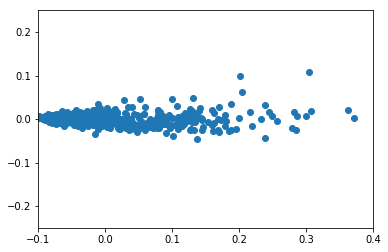

In [157]:
# 軸を見つけて軸を回転させる
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [158]:
# 平均と分散を見る
X_new.mean(axis=0), X_new.std(axis=0)

(array([1.46338712e-18, 3.29262101e-18]), array([0.08751603, 0.01371268]))

(-4, 10)

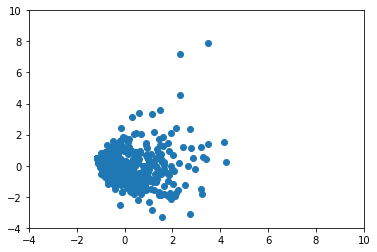

In [159]:
# 白色化
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)

In [160]:
#平均と分散
X_new.mean(axis=0), X_new.std(axis=0)

(array([5.61940652e-17, 2.23215315e-16]), array([0.99912088, 0.99912088]))

# ZCA Whitening

(-3, 3)

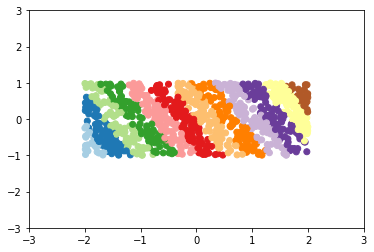

In [161]:
X = np.random.uniform(low=-1, high=1, size=(1000, 2)) * (2, 1)
y = 2 * X[:, 0] + X[:, 1]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [162]:
angle = np.pi / 4


In [163]:
R = np.array([[np.sin(angle), -np.cos(angle)],
              [np.cos(angle), np.sin(angle)]])
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

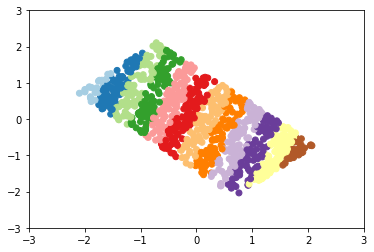

In [164]:
X_rot = X.dot(R)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()
X = X_rot

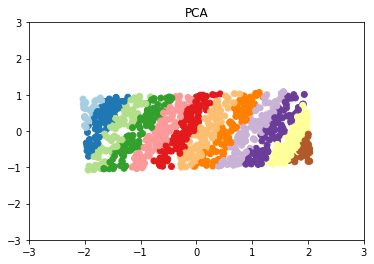

In [165]:
pca = PCA(whiten=False)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("PCA")
plt.show()

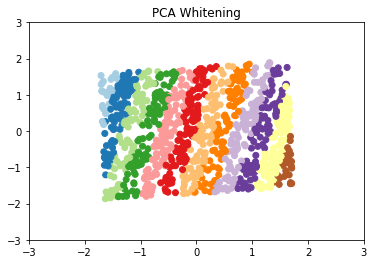

In [166]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("PCA Whitening")
plt.show()

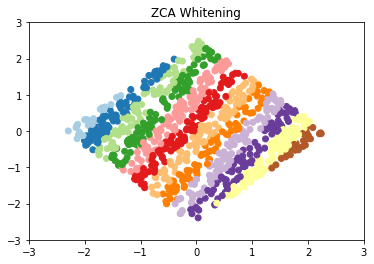

array([[ 0.74270661, -0.66961698],
       [-0.66961698, -0.74270661]])

In [167]:
X_new2 = X_new.dot(pca.components_)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("ZCA Whitening")
plt.show()
pca.components_

In [168]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import numpy as np',
  "# csvファイルの表示\n\n# !cat 2D_example_data.csv\nwith open('2D_example_dame.csv') as f:\n    print(f.read())",
  'data = np.loadtxt("2D_example_dame.csv", delimiter=",")',
  'y = data[:, 0].astype(int) #1列目がラベル、整数に変換',
  'y',
  'X = data[:, 1:3]',
  'X',
  "import matplotlib.pyplot as plt\nget_ipython().run_line_magic('matplotlib', 'inline')\nplt.set_cmap(plt.cm.Paired)",
  'plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")',
  'plt.scatter(X[:, 0], X[:, 1], c=y, s=50)\nplt.xlim(-10, 10)\nplt.ylim(-10, 10)',
  '#NaNと外れ値を場外する\n~np.isnan(X[:, 0])',
  '~np.isnan(X[:,1])',
  '~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])',
  '# X1にはNaNがない\nX1 = X[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]\ny1 = y[~